# Analiza video iger

![valve](valve.png)

V svoji projektni nalogi bom analiziral 16500 najboljših iger glede na Metascore. 

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
igre = pd.read_csv('csvji/podatki.csv', index_col='stevilka')
ocene = pd.read_json("jsoni/ocene.json")
nekaj = pd.read_csv('csvji/igre.csv')
igre['Metascore'] = ocene['Metascore']
igre['Ocena uporabnikov'] = ocene['ocena_uporabnikov']
igre['ESBR'] = nekaj['esbr']
igre['Založnik'] = nekaj['Zaloznik']
igre['1.žanr'] = nekaj['zanr1']
igre['2.žanr'] = nekaj['zanr2']
igre['Založnik'] = igre['Založnik'].replace('Electronic', 'EA')
igre['Založnik'] = igre['Založnik'].replace('Intelligent', 'Intelligent Systems')
igre['Založnik'] = igre['Založnik'].replace('Q', 'Q Entertainment')
zamenjaj = {'pc':'PC', 'nintendo-64':'Nintendo 64', 'playstation':'Playstation', 'playstation-3':'Playstation 3', 'dreamcast':'Dreamcast', 
           'xbox-360':'Xbox 360', 'wii':'Wii', 'switch':'Switch', 'playstation-2':'Playstation 2', 'playstation-4':'Playstation 4', 
           'gamecube':'Gamecube','xbox':'Xbox', 'wii-u':'Wii U', 'game-boy-advance':'Game Boy Advance', '3ds':'Nintendo 3DS','ds':'Nintendo DS',
           'playstation-vita':'Playstation Vita', 'psp':'PSP', 'xbox-one':'Xbox One'}
igre = igre.replace({'konzola':zamenjaj})

igre = igre[:16500]
igre['Metascore'] = pd.to_numeric(igre['Metascore'], errors='coerce')
igre['Ocena uporabnikov'] = pd.to_numeric(igre['Ocena uporabnikov'], errors='coerce')
igre['Skupna ocena'] = igre['Metascore'] + igre['Ocena uporabnikov']*10
igre['Datum izdaje'] = pd.to_datetime(igre['Datum_izdaje'])
igre = igre.drop(['Datum_izdaje', 'url_do_igre'], axis=1)
igre = igre[pd.to_numeric(igre['Ocena uporabnikov'], errors='coerce').notnull()]


,konzola,naslov,povzetek,Metascore,Ocena uporabnikov,ESBR,Založnik,1.žanr,2.žanr,Skupna ocena,Datum izdaje
stevilka,,,,,,,,,,,
109.0,Nintendo 64,Super Mario 64,Mario is super in a whole new way! Combining t...,93.0,9.4,E,Nintendo,Platformer,3D,187.0,1996-09-26


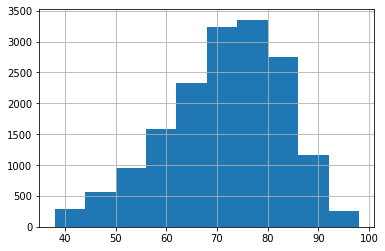

In [72]:
igre['Metascore'].hist()


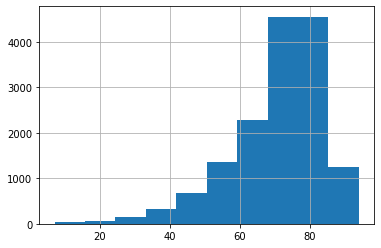

In [75]:
zmnozek = igre['Ocena uporabnikov']*10
zmnozek.hist()


In [95]:
igre.describe(percentiles=[.25, .5, .75])


,Metascore,Ocena uporabnikov,Skupna ocena
count,15219.000000,15219.000000,15219.000000
mean,71.635127,7.066010,142.295223
std,11.471074,1.307092,21.198073
min,38.000000,0.700000,51.000000
25%,65.000000,6.400000,130.000000
50%,73.000000,7.300000,145.000000
75%,80.000000,8.000000,158.000000
max,98.000000,9.400000,189.000000


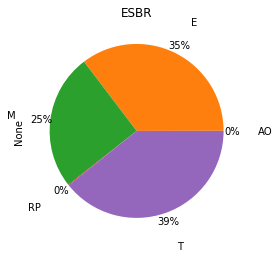

In [17]:
igre.groupby('ESBR').size().plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.4, title='ESBR')

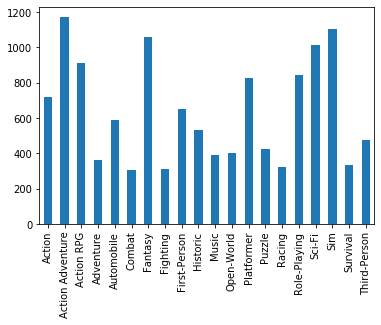

In [57]:
vsota1 =  igre.groupby(['1.žanr']).size().drop(labels=['3D', '2D', 'General', 'Modern', 'Arcade', 'Compilation'])
vsota2 = igre.groupby(['2.žanr']).size().drop(labels=['3D', '2D', 'General', 'Modern', 'Arcade', 'Compilation'])
vsota = vsota2.add(vsota1, fill_value=0)
vsota[vsota>300].plot.bar()

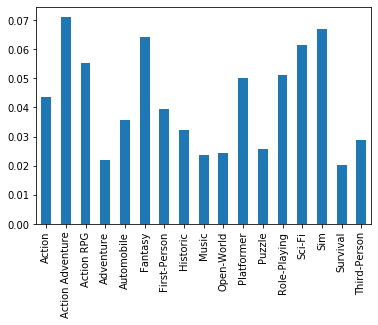

In [59]:
vsotaa = vsota/16500
vsotaa[vsotaa > 0.02].plot.bar()

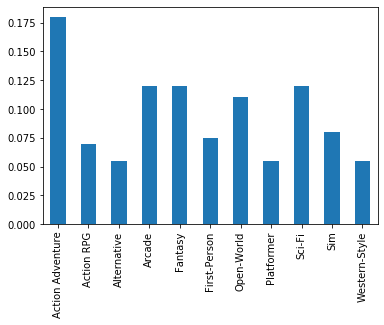

In [104]:
top200meta = igre[:200]
top200meta

vsota1 =  top200meta.groupby(['1.žanr']).size()
vsota2 = top200meta.groupby(['2.žanr']).size()
vsota = vsota2.add(vsota1, fill_value=0)
vsota = vsota/200
vsota[vsota>0.05].drop(labels=['3D', '2D', 'General', 'Modern']).plot.bar()

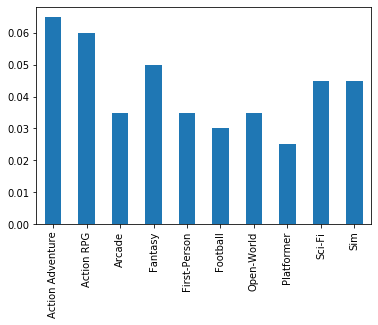

In [100]:
top200spl = igre.sort_values('Skupna ocena',ascending=False)[:200]
vsota1 =  top200spl.groupby(['1.žanr']).size()
vsota2 = top200spl.groupby(['2.žanr']).size()
vsota = vsota2.add(vsota1, fill_value=0)
vsota = vsota/200
vsota[vsota>0.02].drop(labels=['3D', '2D', 'General', 'Modern']).plot.bar()

In [110]:
igre['Razlika'] = igre['Metascore'] - igre['Ocena uporabnikov']*10
igre[igre['Razlika']> 50]

,konzola,naslov,povzetek,Metascore,Ocena uporabnikov,ESBR,Založnik,1.žanr,2.žanr,Skupna ocena,Datum izdaje,Razlika
stevilka,,,,,,,,,,,,
250.0,Gamecube,Metroid Prime 2: Echoes,The sequel to Metroid Prime puts you in the ro...,92.0,3.3,T,Retro,First-Person,Sci-Fi,125.0,2004-11-15,59.0
317.0,Playstation 4,The Witcher 3: Wild Hunt - Blood and Wine,This expansion pack is an old-school add on wi...,91.0,3.9,M,CD,Role-Playing,Action RPG,130.0,2016-05-30,52.0
702.0,Xbox One,N++,"N++ is a fast-paced, action-packed puzzle plat...",88.0,3.4,NaN,Metanet,Platformer,2D,122.0,2017-10-04,54.0
848.0,Switch,SteamWorld Dig 2,Grab your pickaxe and dig into the sequel to S...,88.0,3.2,NaN,Image,Platformer,2D,120.0,2017-09-21,56.0
1138.0,Playstation 3,Unreal Tournament III,Players assume the role of a futuristic warrio...,86.0,3.1,M,Epic,Sci-Fi,Arcade,117.0,2007-12-11,55.0
1327.0,PSP,Grand Theft Auto: Vice City Stories,"Vice City, 1984. Opportunity abounds in a city...",86.0,2.9,M,Rockstar,Modern,Open-World,115.0,2006-10-31,57.0
1725.0,Playstation 3,DmC: Devil May Cry,"In a society infused with demons, only The Ord...",85.0,1.5,M,Ninja,Fantasy,Linear,100.0,2013-01-15,70.0
2196.0,Switch,Mega Man Legacy Collection,Mega Man Legacy Collection is a celebration of...,83.0,3.0,E,EA,Soccer,Sim,113.0,2018-05-22,53.0
2243.0,Wii,Mega Man 9,"[WiiWare] Mega Man fans, the wait is over! The...",83.0,3.1,M,Treyarch,First-Person,Tactical,114.0,2008-09-22,52.0


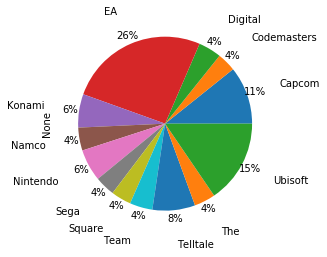

In [49]:
zaloz = igre.groupby('Založnik').size()
zaloz[zaloz>100].plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.4)

In [42]:
felc = igre[igre['Založnik']=='Zen'].groupby('Založnik').mean()

zal = zaloz[zaloz>27].reset_index()
for zaloznik in zal['Založnik']:
    felc = felc.append(igre[igre['Založnik']==zaloznik].groupby('Založnik').mean())
felc = felc.sort_values('Skupna ocena', ascending=False)

felc

,Metascore,Ocena uporabnikov,Skupna ocena
Založnik,,,
Valve,86.821429,7.964286,166.464286
Rockstar,83.739726,7.711594,161.811594
Intelligent Systems,82.194444,7.720588,160.794118
Rare,79.303030,7.925806,159.354839
Blizzard,86.435897,7.179487,158.230769
...,...,...,...
THQ,63.619048,6.326316,127.105263
Blitz,60.868421,6.543750,125.843750
Artificial,57.245614,6.375510,121.326531


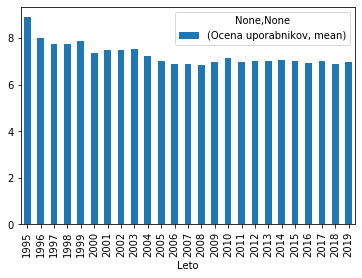

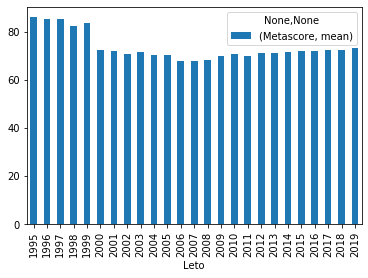

In [45]:
igre1 = igre.drop(columns='Skupna ocena')
igre2 = igre1.drop(columns='Metascore')
igre3 = igre1.drop(columns='Ocena uporabnikov')
igre2.groupby([igre['Datum izdaje'].dt.year.rename('Leto')]).agg({'mean'}).plot.bar()
igre3.groupby([igre['Datum izdaje'].dt.year.rename('Leto')]).agg({'mean'}).plot.bar()

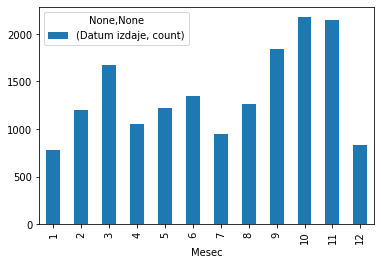

In [47]:
sumarija = igre.groupby([igre['Datum izdaje'].dt.month.rename('Mesec')]).agg({'count'})[['Datum izdaje']]
sumarija.plot.bar()

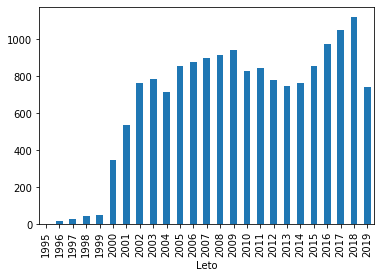

In [65]:
vsota = igre.groupby(igre['Datum izdaje'].dt.year.rename('Leto')).count()
vsota['Datum izdaje'].plot.bar()

In [136]:


igre['Razlika'] = abs(igre.index)
pomozna = igre.sort_values('Ocena uporabnikov', ascending=False)
pomozna.reset_index()
igre['Dejanska razlika'] = abs(igre.index-pomozna.index)
igre.sort_values('Ocena uporabnikov', ascending = False)

,konzola,naslov,povzetek,Metascore,Ocena uporabnikov,ESBR,Založnik,1.žanr,2.žanr,Skupna ocena,Datum izdaje,Razlika,Dejanska razlika
stevilka,,,,,,,,,,,,,
109.0,Nintendo 64,Super Mario 64,Mario is super in a whole new way! Combining t...,93.0,9.4,E,Nintendo,Platformer,3D,187.0,1996-09-26,109.0,3632.0
53.0,Nintendo 64,The Legend of Zelda: Majora's Mask,Thrown into a parallel world by the mischievou...,95.0,9.2,E,Nintendo,Action Adventure,Fantasy,187.0,2000-10-25,53.0,42.0
17.0,Playstation 4,Grand Theft Auto V,The sprawling sun-soaked metropolis of Los San...,97.0,9.2,M,Rockstar,Modern,Open-World,189.0,2014-11-18,17.0,91.0
8001.0,PC,Pathfinder: Kingmaker,Pathfinder: Kingmaker is the first isometric p...,73.0,9.2,NaN,Playtonic,Platformer,3D,165.0,2018-09-25,8001.0,1682.0
277.0,Wii U,Bayonetta 2,In this climatic sequel to the critically accl...,91.0,9.2,M,PlatinumGames,Fantasy,Linear,183.0,2014-09-20,277.0,998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9714.0,Nintendo DS,Mr. Driller: Drill Spirits,Master the art of drilling and take advantage ...,70.0,1.0,E,Nintendo,Puzzle,General,80.0,2004-11-30,9714.0,1261.0
4472.0,Playstation 3,NHL 2K7,Hundreds of new skating animations have been c...,79.0,0.9,E,EA,Soccer,Sim,88.0,2006-11-13,4472.0,3909.0
16282.0,Xbox 360,Mindjack,"With this unique action shooter set in 2031, S...",43.0,0.8,T,M4,Platformer,2D,51.0,2011-01-18,16282.0,3117.0


In [122]:
igre.sort_values('Ocena uporabnikov', ascending=False)

,konzola,naslov,povzetek,Metascore,Ocena uporabnikov,ESBR,Založnik,1.žanr,2.žanr,Skupna ocena,Datum izdaje,Razlika
stevilka,,,,,,,,,,,,
109.0,Nintendo 64,Super Mario 64,Mario is super in a whole new way! Combining t...,93.0,9.4,E,Nintendo,Platformer,3D,187.0,1996-09-26,3632.0
53.0,Nintendo 64,The Legend of Zelda: Majora's Mask,Thrown into a parallel world by the mischievou...,95.0,9.2,E,Nintendo,Action Adventure,Fantasy,187.0,2000-10-25,42.0
17.0,Playstation 4,Grand Theft Auto V,The sprawling sun-soaked metropolis of Los San...,97.0,9.2,M,Rockstar,Modern,Open-World,189.0,2014-11-18,91.0
8001.0,PC,Pathfinder: Kingmaker,Pathfinder: Kingmaker is the first isometric p...,73.0,9.2,NaN,Playtonic,Platformer,3D,165.0,2018-09-25,1682.0
277.0,Wii U,Bayonetta 2,In this climatic sequel to the critically accl...,91.0,9.2,M,PlatinumGames,Fantasy,Linear,183.0,2014-09-20,998.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9714.0,Nintendo DS,Mr. Driller: Drill Spirits,Master the art of drilling and take advantage ...,70.0,1.0,E,Nintendo,Puzzle,General,80.0,2004-11-30,1261.0
4472.0,Playstation 3,NHL 2K7,Hundreds of new skating animations have been c...,79.0,0.9,E,EA,Soccer,Sim,88.0,2006-11-13,3909.0
16282.0,Xbox 360,Mindjack,"With this unique action shooter set in 2031, S...",43.0,0.8,T,M4,Platformer,2D,51.0,2011-01-18,3117.0
